<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/Federated_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import pickle 
import numpy as np 
from mpl_toolkits import mplot3d
import math

In [0]:
with open('/content/features_20_11.bin','rb') as file:
  features = pickle.load(file)
with open('/content/labels_20_11.bin','rb') as file:
  pm = pickle.load(file)

In [0]:
trans=[]
cont=[]
ent=[]
hours=[]
hum=[]
pressure=[]
tempr=[]
deg=[]
speed=[]
prev=[]

for i in features:
  ent.append(float(i[2]))
  cont.append(float(i[1]))
  trans.append(float(i[8]))
  hours.append(float(i[0]))
  hum.append(float(i[3]))
  pressure.append(float(i[7]))
  tempr.append(float(i[4]))
  deg.append(float(i[5]))
  speed.append(float(i[6]))
  prev.append(float(i[9]))

In [0]:
final_shape=len(hours)

trans= np.reshape(trans,(final_shape,1))
hours = np.reshape(hours,(final_shape,1))
cont = np.reshape(cont,(final_shape,1))
ent = np.reshape(ent,(final_shape,1))
hum = np.reshape(hum,(final_shape,1))
pressure = np.reshape(pressure,(final_shape,1))
tempr = np.reshape(tempr,(final_shape,1))
deg = np.reshape(deg,(final_shape,1))
speed = np.reshape(speed,(final_shape,1))
prev = np.reshape(prev,(final_shape,1))


features = np.hstack((hours, cont, ent , hum, tempr, deg, speed, pressure,trans,prev))


TEST 1: 

1.   Number of clusters - 3 
2.   Features used - All 


In [0]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
X = features
y_km = km.fit_predict(X)


In [8]:
print(y_km)

[1 1 1 ... 0 0 0]


In [0]:

c1 = X[y_km ==0]
c2 = X[y_km ==1]
c3 = X[y_km ==2]


In [10]:
print(np.shape(c1))
print(np.shape(c2))
print(np.shape(c3))

(1645, 10)
(1082, 10)
(100, 10)


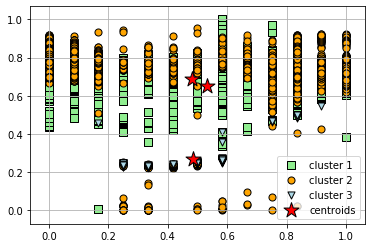

In [11]:
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()


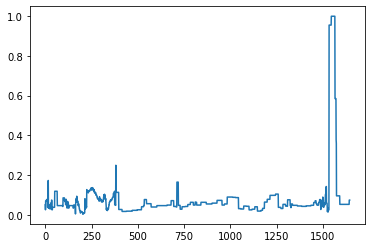

In [21]:
l = []
for i in c1:
  print(i[3])
  l.append(i[9])
  
plt.plot(l)

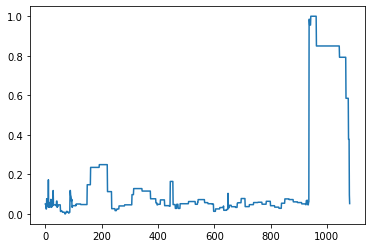

In [22]:
l = []
for i in c2:
  print(i[3])
  l.append(i[9])
  
plt.plot(l)

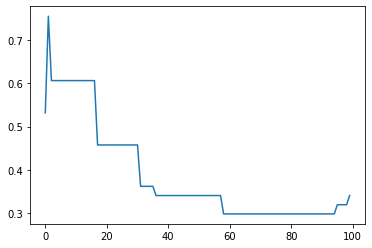

In [16]:
l = []
for i in c3:
  print(i[3])
  l.append(i[3])
  
plt.plot(l)


TEST 2:

Number of clusters - 3
Features used - ent, cont, trans

In [2]:
!pip install firebase-admin
import firebase_admin
from firebase_admin import credentials, db, storage 
import cv2 
import math
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt 
import csv 
import pandas as pd


In [0]:
cred = credentials.Certificate("/content/celestinihdr-2-firebase-adminsdk-x7gew-beb69daef0.json")
app = firebase_admin.initialize_app(cred, {
    'storageBucket': 'celestinihdr-2.appspot.com',
}, name='novemeber')

In [36]:
bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()

anandvihar_hdr=[]
wazirpur_hdr=[]
#wazirpur_jpeg={}
shadipur_jpeg={}
ctr=0
for blob in blobs:
  if(blob.name[7:13]=='static' and blob.name[14]=='P' and blob.name[27]=='j' and int(blob.name[43:45])<18 and int(blob.name[43:45])>6):
    try:
      ctr+=1
      if(ctr%10==0):
        blob.download_to_filename('/content/' + "wazirpur_jpeg" + str(blob.name.split('/')[-1])+ '.jpeg')
        name = "wazirpur_jpeg" + str(blob.name.split('/')[-1])+ '.jpeg' 
        print(ctr)
        im = cv2.imread(name)
        im = cv2.resize(im,(256,256))
        wazirpur_jpeg[blob.name]=im
    except:
        print(blob.name)
        
  if(blob.name[7:13]=='static' and blob.name[14]=='P' and blob.name[25]=='j'):
    try:
      ctr+=1
      if(ctr%5==0):
        blob.download_to_filename('/content/' + "shadipur_jpeg" + str(blob.name.split('/')[-1])+ '.jpeg')
        name = "shadipur_jpeg" + str(blob.name.split('/')[-1])+ '.jpeg' 
        ctr+=1
        print(ctr)
        im = cv2.imread(name)
        im = cv2.resize(im,(256,256))
        #Extra step of rotation 
        im = cv2.rotate(im,rotateCode =cv2.ROTATE_90_CLOCKWISE)
        shadipur_jpeg[blob.name]=im
    except:
      print(blob.name)
    

6
11
16
21
26
31
36
41
46
51
56
61
66
71
76
81
86
91
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380


In [37]:
print(len(shadipur_jpeg))
print(len(wazirpur_jpeg))

18
29


In [0]:
def trans_deg(im):
  B=np.zeros((256,256))
  D=np.zeros((256,256))
  C=np.zeros((256,256))
  # 3rd channel or im[2] has been split as b,g,r 

  b,g,r = cv2.split(im)

  for i in range(b.shape[0]):
    for j in range(b.shape[1]):
      D[i][j] = min(b[i][j], g[i][j], r[i][j])
      B[i][j] = max(b[i][j], g[i][j], r[i][j])
      C[i][j] = B[i][j] - D[i][j]

  d = np.sum(D)/float(np.size(D))
  b = np.sum(B)/float(np.size(B))
  c = b-d 
  A = (0.33)*max(np.ndarray.flatten(B)) + (0.66)*b
  
  x1=((A - d)/float(A)) 
  x2=(c/float(A))
  u = 10.127489
  v= -8.336512
  s = 0.13606234
  
  w = math.exp(-0.5*(u*x1 + v*x2)+s)
  
  if(w<=0.1):
      w=0
  elif(w<=0.3):
    w=1
  elif(w<=0.5):
    w=2
  elif(w<=0.7):
    w=3
  elif(w<=0.8):
    w=4
  elif(w<=0.9):
    w=5
    
  return w

In [0]:
def entropy(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  hist = cv2.calcHist( [image.astype('float32')],
              [0], 
              None,
               [256], 
              [0,256] )
  h_norm = 0
  h_norm = cv2.normalize(hist, h_norm)
  ent = 0
  for p in h_norm:
    try:
      ent += p*math.log(p, 2)
    except:
      pass
    
  return (-1 * ent[0])

In [0]:
def contrast(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  s = 0
  ss = 0
  mean = np.mean(image)
  x = (-1 * mean * (np.ones(image.shape)))
  ss = np.square(np.add(image, x))
  cont = np.sqrt(np.sum(ss)/float(image.size))
  return cont

In [0]:
feat=[]
ctr=0
for i in wazirpur_jpeg:
  l=[]
  l.append(wazirpur_jpeg[i])
  l.append(i[32:48])
  l.append(entropy(wazirpur_jpeg[i]))
  l.append(contrast(wazirpur_jpeg[i]))
  l.append(trans_deg(wazirpur_jpeg[i]))
  feat.append(l)
  ctr+=1
  print(ctr)
  

for i in shadipur_jpeg:
  l=[]
  l.append(shadipur_jpeg[i])
  l.append(i[30:46]) ##
  l.append(entropy(shadipur_jpeg[i]))
  l.append(contrast(shadipur_jpeg[i]))
  l.append(trans_deg(shadipur_jpeg[i]))
  feat.append(l)
  ctr+=1
  print(ctr)
  



In [0]:
print(feat)

In [0]:

image_match=[]
for l in feat:
  temp = l[1]
  #print(temp)
  temp=temp[-24:-1]
  #print(temp)
  temp=temp.split('-')
  #print(temp)
  newtemp=temp[2].split(' ')
  #print(newtemp)
  newesttemp=newtemp[1].split(':')
  #print(newesttemp)
  j=int(newesttemp[1])
  if(j<=7.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  t=[]
  t.append(l[0])
  t.append(final)
  #t.append(final[11:13])
  t.append(l[2])
  t.append(l[3])
  t.append(l[4])
  image_match.append(t)

  

In [0]:
print(image_match)

In [0]:
df_ = pd.read_csv('/content/november_wazirpur.csv')
data_ = df_.mask(df_.eq('None')).dropna()
file_ = data_.to_csv('/content/wazirpur_labels_new.csv')

label =[]
k=0
prev = '216'
with open('/content/wazirpur_labels_new.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    k+=1
    if(k%5==0):
        prev=row[3]
    if(k>3):
      l=[]
      l.append(row[1]) #DATE 
      l.append(row[3]) #PM
      l.append(prev)
      label.append(l) 

In [0]:
df_ = pd.read_csv('/content/shadipur_novemeber.csv')
data_ = df_.mask(df_.eq('None')).dropna()
file_ = data_.to_csv('/content/shadipur_novemeber_new.csv')

k=0
with open('/content/shadipur_novemeber_new.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    k+=1
    if(k%5==0):
        prev=row[3]
    if(k>3):
      l=[]
      l.append(row[1]) #DATE 
      l.append(row[3]) #PM
      l.append(prev)
      label.append(l) 

In [0]:
ctr=0
image_label=[]
for i in image_match:
  for l in label:
    if(l[0]==i[1]):
      print(l[0])
      a=[]
      a.append(i[0])
      a.append(i[1])
      a.append(i[2])
      a.append(i[3])
      a.append(i[4])
      a.append(l[1])
      a.append(l[2])
      image_label.append(a)
      ctr+=1


In [0]:
print(image_label)

In [0]:
trans=[]
cont=[]
ent=[]
pm=[]
image=[]


for i in image_label:
  image.append(i[0])
  trans.append(float(i[4]))
  cont.append(float(i[3]))
  ent.append(float(i[2]))
  pm.append(float(i[5]))

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
final_shape=len(cont)

#FEATURES 

trans= np.reshape(trans,(final_shape,1))
ent = np.reshape(ent,(final_shape,1))
cont = np.reshape(cont,(final_shape,1))

s2 = MinMaxScaler()
cont = s2.fit_transform(cont)
s3 = MinMaxScaler()
ent = s3.fit_transform(ent)

features = np.hstack((cont, ent, trans))


In [0]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
X = features
y_km = km.fit_predict(X)


In [55]:
print(y_km)

[2 2 2 2 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]
